# CTGAN_on_data_test_engv3

Generate synthetic data from data_test 2011 to 2017 concatenated 

In [1]:
import numpy as np
import pandas as pd
from ctgan import CTGANSynthesizer
from model import Model
import gc

from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, KFold

In [2]:
list_column = ['salaire_mensuel_cleaned', 'anciennete_emploi_cleaned',
       'anciennete_bni_cleaned', 'categorie_employeur_cleaned_UNIQUEVAL',
       'mensualite_cleaned', 'argent_journalier',
       'taux_endettement_cleaned', 'salaire_vivable',
       'nb_salaires_cleaned', 'age_end', 'age_cleaned', 'nature_CAP_cleaned_UNIQUEVAL',
       'statut_marital_cleaned_UNIQUEVAL',
       'conventionne_cleaned_UNIQUEVAL', 'type_contrat_cleaned', 'duree_pret_cleaned', 'code_DTX_cleaned_UNIQUEVAL']

In [3]:
cat_col= ['categorie_employeur_cleaned_UNIQUEVAL','nature_CAP_cleaned_UNIQUEVAL',
       'statut_marital_cleaned_UNIQUEVAL',
       'conventionne_cleaned_UNIQUEVAL', 'type_contrat_cleaned','target']
cat_feat= [3,11,12,13,14]
num_col= ['salaire_mensuel_cleaned', 'anciennete_emploi_cleaned',
       'anciennete_bni_cleaned',
       'mensualite_cleaned', 'argent_journalier',
       'taux_endettement_cleaned', 'salaire_vivable',
       'nb_salaires_cleaned', 'age_end', 'age_cleaned', 'duree_pret_cleaned']

In [4]:
data_train = pd.read_csv('data/Version4/data_train_engv3_new.csv', delimiter=';')
data_train=data_train[list_column]
data_val = pd.read_csv('data/Version4/data_val_engv3_new.csv', delimiter=';')
data_val=data_val[list_column]
data_test = pd.read_csv('data/Version4/data_test_engv3_new.csv', delimiter=';')
data_test=data_test[list_column]

In [5]:
X_train = data_train.drop('code_DTX_cleaned_UNIQUEVAL', axis=1)
y_train = data_train['code_DTX_cleaned_UNIQUEVAL']
X_val = data_val.drop('code_DTX_cleaned_UNIQUEVAL', axis=1)
y_val = data_val['code_DTX_cleaned_UNIQUEVAL']
X_test = data_test.drop('code_DTX_cleaned_UNIQUEVAL', axis=1)
y_test = data_test['code_DTX_cleaned_UNIQUEVAL']

## Use of CTGAN to generate data (gan_xp)

In [58]:
def get_gan_dataset(x_train, y_train, x_test, cat_cols, gen_x_times=1.2, epochs=300):
    """
    Extends train by generating new data by GAN
    :param x_train:  train dataframe
    :param y_train: target for train dataframe
    :param x_test: dataframe
    :param cat_cols: List of categorical columns
    :param gen_x_times: Factor for which initial dataframe should be increased
    :param cat_cols: List of categorical columns
    :param epochs: Number of epoch max to train the GAN
    :return: generated data
    """

    if gen_x_times == 0:
        raise ValueError("Passed gen_x_times with value 0!")
    x_train["target"] = y_train
    x_test_bigger = int(1.1 * x_test.shape[0] / x_train.shape[0])
    print("x_test_bigger:",x_test_bigger)
    ctgan = CTGANSynthesizer()
    ctgan.fit(x_train, cat_cols, epochs=epochs)
    print("row numbers:",(x_test_bigger) * x_train.shape[0])
    generated_df = ctgan.sample((x_test_bigger) * x_train.shape[0])
    data_dtype = x_train.dtypes.values
    
    for i in range(len(generated_df.columns)):
        generated_df[generated_df.columns[i]] = generated_df[
            generated_df.columns[i]
        ].astype(data_dtype[i])
    
    return generated_df



In [59]:
gan_train = get_gan_dataset(X_test,y_test,X_test,cat_col)

x_test_bigger: 1


/home/misa/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/misa/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/misa/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/misa/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/misa/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarn

GAN: Early stopping after epochs 113
row numbers: 3028


In [60]:
gan_train.shape

(3028, 17)

In [61]:
data_test.shape

(3028, 17)

In [62]:
gan_train

,salaire_mensuel_cleaned,anciennete_emploi_cleaned,anciennete_bni_cleaned,categorie_employeur_cleaned_UNIQUEVAL,mensualite_cleaned,argent_journalier,taux_endettement_cleaned,salaire_vivable,nb_salaires_cleaned,age_end,age_cleaned,nature_CAP_cleaned_UNIQUEVAL,statut_marital_cleaned_UNIQUEVAL,conventionne_cleaned_UNIQUEVAL,type_contrat_cleaned,duree_pret_cleaned,target
0,4.217751e+05,214.144165,129.051467,2,389220.477978,7060.536125,32.911518,4.733286e+04,6.067108,56.919660,44.798413,1,1,0,0,23,0
1,1.117128e+05,185.220989,50.328338,1,81765.247548,6115.061197,30.295251,-5.560788e+04,10.700912,38.283870,26.620812,1,0,1,0,10,0
2,2.024642e+05,160.898466,86.125087,1,55875.559378,5342.657610,32.299631,2.995949e+04,42.154768,49.977740,26.207025,1,0,0,0,23,0
3,1.802578e+06,124.409478,-6.024464,1,45180.068844,3295.973746,32.337209,7.356674e+04,1.180069,26.579470,29.112778,0,0,1,0,36,0
4,2.815557e+05,54.640972,108.671607,1,6620.648839,6857.550219,26.277682,3.684437e+04,50.136298,29.739379,24.423469,0,0,0,0,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,1.003801e+06,69.776066,21.878787,1,157852.009318,25055.726476,32.086694,7.123679e+04,54.216518,30.148304,26.191578,1,0,0,0,13,0
3024,1.060251e+05,63.143984,22.120649,1,82087.286449,8933.816309,32.843898,1.242516e+05,4.578134,32.356153,33.111979,0,0,0,0,48,1
3025,1.331728e+06,30.552000,8.476351,1,22153.852876,1342.747520,32.815859,1.100042e+06,12.959398,35.781314,44.702124,0,0,0,0,23,0
3026,2.516461e+05,23.824283,4.336912,0,13709.613882,8721.343544,28.068369,7.588421e+04,105.298380,51.989600,45.640306,1,0,0,0,23,0


In [63]:
data_test

,salaire_mensuel_cleaned,anciennete_emploi_cleaned,anciennete_bni_cleaned,categorie_employeur_cleaned_UNIQUEVAL,mensualite_cleaned,argent_journalier,taux_endettement_cleaned,salaire_vivable,nb_salaires_cleaned,age_end,age_cleaned,nature_CAP_cleaned_UNIQUEVAL,statut_marital_cleaned_UNIQUEVAL,conventionne_cleaned_UNIQUEVAL,type_contrat_cleaned,duree_pret_cleaned,code_DTX_cleaned_UNIQUEVAL
0,275800.00,73.0,30.0,1,90934.406378,6162.186454,32.971141,184865.593622,25.0,44.0,41.0,1,0,1,0,36,0
1,500000.00,28.0,25.0,1,164950.000000,11168.333333,32.990000,335050.000000,25.0,28.0,26.0,0,0,0,0,24,0
2,293674.06,86.0,46.0,1,94093.168824,6652.696373,32.040000,199580.891176,46.0,53.0,50.0,0,0,0,0,36,0
3,160000.00,42.0,24.0,0,52560.000000,3581.333333,32.850000,107440.000000,22.0,24.0,22.0,0,2,0,0,24,0
4,382966.00,111.0,9.0,3,125850.352980,8570.521567,32.862017,257115.647020,1.0,42.0,37.0,0,0,0,0,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,134000.00,149.0,19.0,0,44072.600000,2997.580000,32.890000,89927.400000,18.0,32.0,30.0,0,3,0,0,24,0
3024,84373.00,103.0,28.0,1,27193.417900,1905.986070,32.230000,57179.582100,27.0,48.0,46.0,0,0,0,0,24,0
3025,373000.00,93.0,71.0,1,108505.700000,8816.476667,29.090000,264494.300000,70.0,47.0,45.0,0,1,0,0,24,0
3026,128901.80,77.0,3.0,1,41622.391220,2909.313626,32.290000,87279.408780,3.0,33.0,30.0,0,0,0,0,36,0


In [64]:
gan_train.to_csv("results/dataset_gan_test_2.csv",sep=";")

### Import data gan test to avoid relaunch ctgan

In [65]:
gan_train = pd.read_csv("results/dataset_gan_test_2.csv",sep=";")

In [66]:
gan_train["target"].max()

1

In [67]:
data_copy = gan_train.drop(["Unnamed: 0","salaire_vivable","argent_journalier","age_end" ,"target"],axis=1)

In [68]:
data_copy['salaire_vivable'] = data_copy['salaire_mensuel_cleaned'] - data_copy['mensualite_cleaned']
data_copy['argent_journalier']= data_copy['salaire_vivable']/30
data_copy['age_end'] = data_copy['age_cleaned'] + (data_copy['duree_pret_cleaned']/12)

In [69]:
gan_xp = data_copy

### Evaluation of gan_xp based on true labels

In [15]:
def evaluate(data_train, data_test, list_column):
    #Training data on all data train
    data_train_used = pd.DataFrame()
    data_train_used = data_train[list_column]
    #Training model on all data_train
    data_train_used_dum = pd.get_dummies(data_train_used)
    features_train = data_train_used_dum.drop('code_DTX_cleaned_UNIQUEVAL', axis=1)
    target_train = data_train_used_dum['code_DTX_cleaned_UNIQUEVAL']
    model = GradientBoostingClassifier(learning_rate=0.05)
    model.fit(features_train, target_train)
    
    
    data_test_dum = pd.get_dummies(data_test)
    data_test_used = pd.DataFrame()
    for column in data_train_used_dum.columns:
        try:
            data_test_used[column] = data_test_dum[column]
        except KeyError:
            data_test_used[column] = np.zeros(len(data_test_dum))
    features_test = data_test_used.drop('code_DTX_cleaned_UNIQUEVAL', axis=1)
    target_test = data_test_used['code_DTX_cleaned_UNIQUEVAL']
    pred = model.predict_proba(features_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(target_test, pred)
    plt.plot(fpr, tpr)
    plt.legend(labels=[metrics.auc(fpr, tpr)])
    plt.show()

In [16]:
def evaluate_cv(data, list_column):
    data_used = pd.DataFrame()
    data_used = data[list_column]
    #Removing year to list of columns
    
    X = data.drop('code_DTX_cleaned_UNIQUEVAL', axis=1).values
    y = data['code_DTX_cleaned_UNIQUEVAL'].values
    
    cv = KFold(n_splits=10,shuffle=True,random_state=42)
    GB = GradientBoostingClassifier(learning_rate=0.05)
    
    list_AUC = []
    list_abs = []
    i = 1
    for train, test in cv.split(X, y):
        GB.fit(X[train], y[train])
        pred = GB.predict_proba(X[test])[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(y[test], pred)
        list_AUC.append(metrics.auc(fpr, tpr))
        list_abs.append(i)
        i+=1
        plt.plot(fpr, tpr)
    print('Moyenne: ', np.mean(list_AUC))
    print('Std dev: ', np.std(list_AUC))
    plt.legend(labels=list_AUC)
    plt.show()

#### AUC of data_test

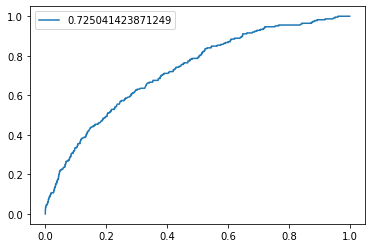

In [71]:
data = data_train
evaluate(data, data_test, list_column)

#### AUC of gan_xp with data_test labels

225


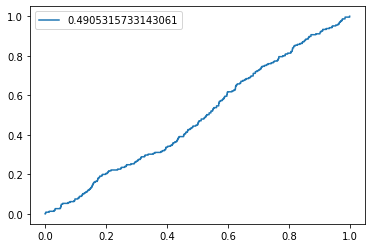

In [72]:
gan_xp['code_DTX_cleaned_UNIQUEVAL'] = data_test['code_DTX_cleaned_UNIQUEVAL']
print(gan_xp['code_DTX_cleaned_UNIQUEVAL'][gan_xp['code_DTX_cleaned_UNIQUEVAL'] == 1].count())
evaluate(data, gan_xp, list_column)

#### AUC of gan_xp with synth labels

In [93]:
gan_xp['code_DTX_cleaned_UNIQUEVAL'] = gan_train["target"]
#gan_xp.loc[gan_xp.code_DTX_cleaned_UNIQUEVAL >=1 , 'code_DTX_cleaned_UNIQUEVAL'] = 1
#gan_xp.loc[gan_xp.code_DTX_cleaned_UNIQUEVAL <1 , 'code_DTX_cleaned_UNIQUEVAL'] = 0
gan_xp['code_DTX_cleaned_UNIQUEVAL'][gan_xp['code_DTX_cleaned_UNIQUEVAL'] == 1].count()

358

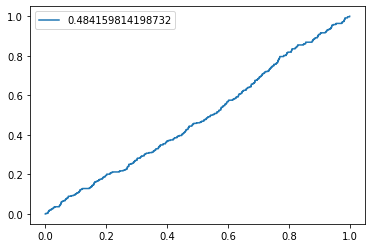

In [74]:
evaluate(data, gan_xp, list_column)

Moyenne:  0.5145386643967427
Std dev:  0.014177937588483543


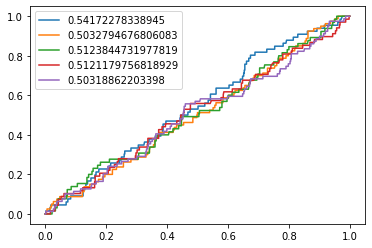

In [96]:
evaluate_cv(gan_xp,list_column)

### Try adversarial Training (data_train+data_synth) on data_test and data_synth_test
To improve model defense against adversarial attack

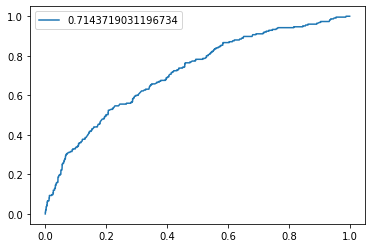

In [88]:
data_synth, data_synth_test = train_test_split(gan_xp, test_size=0.20, stratify=gan_xp['code_DTX_cleaned_UNIQUEVAL'])
data_extend = pd.concat([data_train,data_synth])
evaluate(data_extend, data_test, list_column)

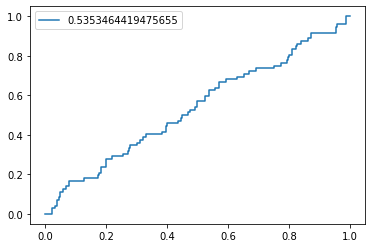

In [89]:
evaluate(data_extend, data_synth_test, list_column)

Moyenne:  0.6824843030655021
Std dev:  0.009455451766844524


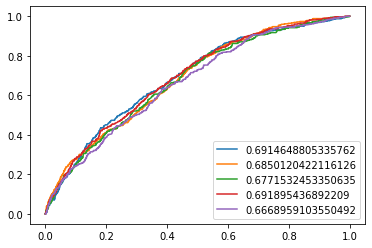

In [97]:
evaluate_cv(data_extend,list_column)

Constat : " La performance du modèle malgré l'ajout des instances synthétiques dans les données d'apprentissage n'améliore pas l'AUC sur l'évaluation du data_synth_test"

- Train : data_train 
    - AUC on data_test = 72
    - AUC on gan_xp (all data_synth) = 48.41


- Train : data_extend (data_train + 80% gan_xp)
    - AUC on data_test = 71
    - AUC on data_synth_test (20%) = 53.53
    
    
- CV :
    - CV on gan_xp = 51.45
    - CV on data_extend = 68.24 
    
TODO :
- Produire des datas synthétiques plus précis ; (Adversarial test)
- Augmenter le volume de datas générés 
____________________

## Methods for generating data for increasing train from "Diyago/GAN-for-tabular-data"

In [14]:
def extend_gan_train(x_train, y_train, x_test, cat_cols, num_cols ,gen_x_times=1.2, epochs=500):
    """
    Extends train by generating new data by GAN
    :param x_train:  train dataframe
    :param y_train: target for train dataframe
    :param x_test: dataframe
    :param cat_cols: List of categorical columns
    :param gen_x_times: Factor for which initial dataframe should be increased
    :param cat_cols: List of categorical columns
    :param epochs: Number of epoch max to train the GAN
    :return: extended train with target
    """

    if gen_x_times == 0:
        raise ValueError("Passed gen_x_times with value 0!")
    x_train["target"] = y_train
    x_test_bigger = int(1.1 * x_test.shape[0] / x_train.shape[0])
    ctgan = CTGANSynthesizer()
    ctgan.fit(x_train, cat_cols, epochs=epochs)
    generated_df = ctgan.sample((x_test_bigger) * x_train.shape[0])
    data_dtype = x_train.dtypes.values

    for i in range(len(generated_df.columns)):
        generated_df[generated_df.columns[i]] = generated_df[
            generated_df.columns[i]
        ].astype(data_dtype[i])

    generated_df = pd.concat(
        [
            x_train.sample(frac=(x_test_bigger), replace=True, random_state=42),
            generated_df,
        ]
    ).reset_index(drop=True)

    #num_cols = []
    #for col in x_train.columns:
    #    if "num" in col:
    #        num_cols.append(col)

    for num_col in num_cols:
        min_val = x_test[num_col].quantile(0.02)
        max_val = x_test[num_col].quantile(0.98)
        generated_df = generated_df.loc[
            (generated_df[num_col] >= min_val) & (generated_df[num_col] <= max_val)
        ]
    generated_df = generated_df.reset_index(drop=True)
    ad_model = adversarial_test(x_test, generated_df.drop("target", axis=1), cat_cols)

    generated_df["test_similarity"] = ad_model.predict(
        generated_df.drop("target", axis=1), return_shape=False
    )
    generated_df.sort_values("test_similarity", ascending=False, inplace=True)
    generated_df = generated_df.head(int(gen_x_times * x_train.shape[0]))
    x_train = pd.concat(
        [x_train, generated_df.drop("test_similarity", axis=1)], axis=0
    ).reset_index(drop=True)
    gen = generated_df.copy()
    del generated_df
    gc.collect()
    return x_train.drop("target", axis=1), x_train["target"], gen



In [2]:
def adversarial_test(left_df, right_df, cat_cols):
    """
    Trains adversarial model to distinguish train from test
    :param left_df:  dataframe
    :param right_df: dataframe
    :param cat_cols: List of categorical columns
    :return: trained model
    """
    # sample to shuffle the data
    left_df = left_df.copy().sample(frac=1).reset_index(drop=True)
    right_df = right_df.copy().sample(frac=1).reset_index(drop=True)

    left_df = left_df.head(right_df.shape[0])
    right_df = right_df.head(left_df.shape[0])

    left_df["gt"] = 0
    right_df["gt"] = 1

    concated = pd.concat([left_df, right_df])
    lgb_model = Model(
        cat_validation="Single",
        encoders_names=("OrdinalEncoder",),
        cat_cols=cat_cols,
        model_validation=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        model_params={
            "metrics": "AUC",
            "max_depth": 2,
            "max_bin": 100,
            "n_estimators": 500,
            "learning_rate": 0.02,
            "random_state": 42,
        },
    )
    train_score, val_score, avg_num_trees = lgb_model.fit(
        concated.drop("gt", axis=1), concated["gt"]
    )

    print(
        "ROC AUC adversarial: train %.2f%% val %.2f%%"
        % (train_score * 100.0, val_score * 100.0)
    )
    return lgb_model

#### size to generate = 50% of size of data_test

In [115]:
cat_col_1 = ['categorie_employeur_cleaned_UNIQUEVAL','nature_CAP_cleaned_UNIQUEVAL',
       'statut_marital_cleaned_UNIQUEVAL',
       'conventionne_cleaned_UNIQUEVAL', 'type_contrat_cleaned']

In [143]:
data_extend_1, data_extend_1_target = extend_gan_train(X_test,y_test,X_val,cat_col_1,num_col,gen_x_times=0.5)

/home/misa/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/misa/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/misa/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/misa/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/misa/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarn

GAN: Early stopping after epochs 120


/home/misa/.local/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/misa/.local/lib/python3.6/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/home/misa/.local/lib/python3.6/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
/home/misa/.local/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/misa/.local/lib/python3.6/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Referenc

Mean score train : 0.6777
Mean score val : 0.6471
ROC AUC adversarial: train 67.77% val 64.71%


In [144]:
data_extend_1['target'] = data_extend_1_target
data_extend_1.to_csv("results/data_test_extend.csv",sep=";")

### Import data gan test to avoid relaunch ctgan

In [7]:
gan_train = pd.read_csv("results/data_test_extend.csv",sep=";")

In [8]:
gan_train["target"].max()

1

In [9]:
data_copy = gan_train.drop(["Unnamed: 0","salaire_vivable","argent_journalier","age_end" ,"target"],axis=1)

In [10]:
data_copy['salaire_vivable'] = data_copy['salaire_mensuel_cleaned'] - data_copy['mensualite_cleaned']
data_copy['argent_journalier']= data_copy['salaire_vivable']/30
data_copy['age_end'] = data_copy['age_cleaned'] + (data_copy['duree_pret_cleaned']/12)

In [11]:
gan_xp_1 = data_copy

#### AUC of gan_xp with synth labels

In [12]:
gan_xp_1['code_DTX_cleaned_UNIQUEVAL'] = gan_train["target"]
#gan_xp.loc[gan_xp.code_DTX_cleaned_UNIQUEVAL >=1 , 'code_DTX_cleaned_UNIQUEVAL'] = 1
#gan_xp.loc[gan_xp.code_DTX_cleaned_UNIQUEVAL <1 , 'code_DTX_cleaned_UNIQUEVAL'] = 0
gan_xp_1['code_DTX_cleaned_UNIQUEVAL'][gan_xp_1['code_DTX_cleaned_UNIQUEVAL'] == 1].count()

296

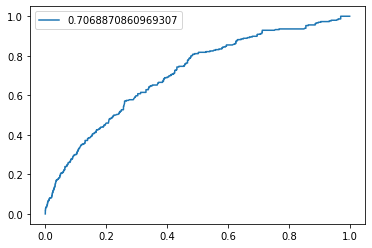

In [151]:
data = data_train
evaluate(data, gan_xp_1, list_column)

Moyenne:  0.736646330505909
Std dev:  0.0486405044860816


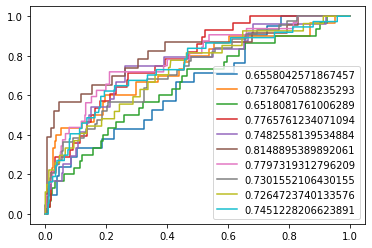

In [153]:
evaluate_cv(gan_xp_1,list_column)

### Try adversarial Training (data_extend_1) on data_test and data_synth_test
To improve model defense against adversarial attack

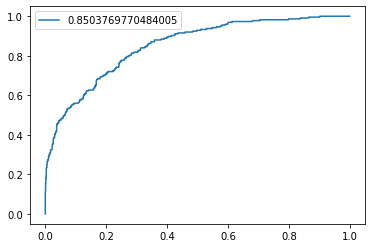

In [27]:
data_synth, data_synth_test = train_test_split(gan_xp_1, test_size=0.15, stratify=gan_xp_1['code_DTX_cleaned_UNIQUEVAL'])
evaluate(data_synth, data_test, list_column)

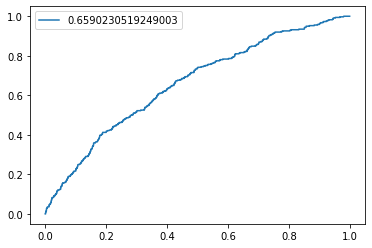

In [28]:
evaluate(data_synth, data_val, list_column)

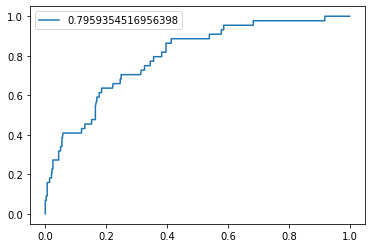

In [29]:
evaluate(data_synth, data_synth_test, list_column)

Moyenne:  0.7135805603037506
Std dev:  0.012608999112176347


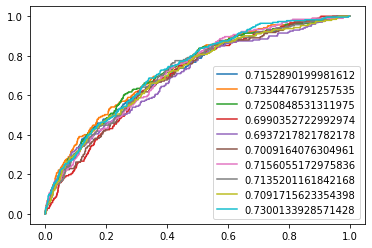

In [30]:
data_extend_train = pd.concat([gan_xp_1,data_train])
evaluate_cv(data_extend_train,list_column)

Constat :

- Train : data_train 
    - AUC on gan_xp_1 = 70.68 (A)  
Performance moyenne malgré la présence les perturbations


- Train : data_synth (85% gan_xp_1)
    - AUC on data_test = 85.03  
<b>Normal parce que data_synth est généré pour ressembler à data_test 
en plus de contenir les instances de data_test</b>
    
    - *AUC on data_val = 65.9 
    
    - AUC on data_synth_test (15%) = 79.59
<b>L'adversarial training (data_synth) montre que le modèle est robuste lorsqu'il est évalué sur data_synth_test).
    A confirmer avec d'autres adversarial examples</b>
    
    
- CV :
    - CV on gan_xp_1 = 73.66
    - CV on data_extend_train = 71.31 (train + gan_xp_1)
    
TODO :
- Test the model trained by gan_xp_1 with other adversarial examples
- Use data_train to generate TGAN 
- More TGAN instances 
____________________

In [21]:
gan_xp_1

,salaire_mensuel_cleaned,anciennete_emploi_cleaned,anciennete_bni_cleaned,categorie_employeur_cleaned_UNIQUEVAL,mensualite_cleaned,taux_endettement_cleaned,nb_salaires_cleaned,age_cleaned,nature_CAP_cleaned_UNIQUEVAL,statut_marital_cleaned_UNIQUEVAL,conventionne_cleaned_UNIQUEVAL,type_contrat_cleaned,duree_pret_cleaned,salaire_vivable,argent_journalier,age_end,code_DTX_cleaned_UNIQUEVAL
0,275800.000000,73.000000,30.000000,1,90934.406378,32.971141,25.000000,41.000000,1,0,1,0,36,184865.593622,6162.186454,44.000000,0
1,500000.000000,28.000000,25.000000,1,164950.000000,32.990000,25.000000,26.000000,0,0,0,0,24,335050.000000,11168.333333,28.000000,0
2,293674.060000,86.000000,46.000000,1,94093.168824,32.040000,46.000000,50.000000,0,0,0,0,36,199580.891176,6652.696373,53.000000,0
3,160000.000000,42.000000,24.000000,0,52560.000000,32.850000,22.000000,22.000000,0,2,0,0,24,107440.000000,3581.333333,24.000000,0
4,382966.000000,111.000000,9.000000,3,125850.352980,32.862017,1.000000,37.000000,0,0,0,0,60,257115.647020,8570.521567,42.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537,436162.000000,270.000000,54.000000,1,143628.146600,32.930000,53.000000,52.000000,1,0,0,0,48,292533.853400,9751.128447,56.000000,0
4538,436162.000000,270.000000,54.000000,1,143628.146600,32.930000,53.000000,52.000000,1,0,0,0,48,292533.853400,9751.128447,56.000000,0
4539,436162.000000,270.000000,54.000000,1,143628.146600,32.930000,53.000000,52.000000,1,0,0,0,48,292533.853400,9751.128447,56.000000,0
4540,111300.000000,34.000000,34.000000,2,36695.610000,32.970000,34.000000,33.000000,1,0,0,0,36,74604.390000,2486.813000,36.000000,0


#### size to generate = 20% of size of data_test

In [6]:
cat_col_1 = ['categorie_employeur_cleaned_UNIQUEVAL','nature_CAP_cleaned_UNIQUEVAL',
       'statut_marital_cleaned_UNIQUEVAL',
       'conventionne_cleaned_UNIQUEVAL', 'type_contrat_cleaned']

In [7]:
data_extend_2, data_extend_2_target, gan_data  = extend_gan_train(X_test,y_test,X_val,cat_col_1,num_col,gen_x_times=0.20)

NameError: name 'extend_gan_train' is not defined

In [16]:
#gan_data['target'] = data_extend_1_target
gan_data.to_csv("results/gan_data_test.csv",sep=";")

### Import data gan test to avoid relaunch ctgan

In [8]:
gan_data = pd.read_csv("results/gan_data_test.csv",sep=";")

In [9]:
gan_data["target"].min()

0

In [10]:
data_copy = gan_data.drop(["Unnamed: 0","salaire_vivable","argent_journalier","age_end" ,"target"],axis=1)

In [11]:
data_copy['salaire_vivable'] = data_copy['salaire_mensuel_cleaned'] - data_copy['mensualite_cleaned']
data_copy['argent_journalier']= data_copy['salaire_vivable']/30
data_copy['age_end'] = data_copy['age_cleaned'] + (data_copy['duree_pret_cleaned']/12)

In [12]:
gan_xp_2 = data_copy

In [13]:
gan_xp_2['code_DTX_cleaned_UNIQUEVAL'] = gan_data["target"]

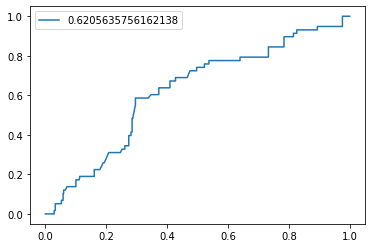

In [17]:
data = data_train
evaluate(data, gan_xp_2, list_column)

In [18]:
gan_xp_2.shape

(605, 18)

In [19]:
data_test.shape

(3028, 17)